In [13]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


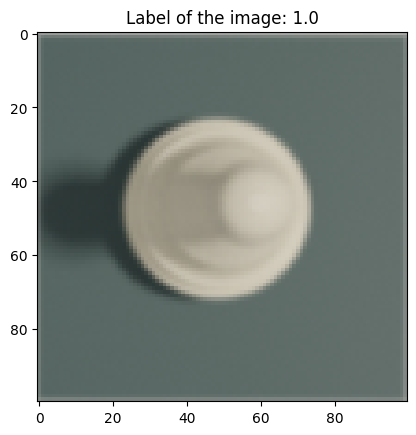

In [31]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, label_dir):
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.images = os.listdir(root_dir)
        self.labels = torch.load(label_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path)

        # Convert the image to a tensor
        image = transforms.ToTensor()(image)

        # Get the label of the image
        
        label = self.labels[int(img_name[3:9])]

        return image, label

train_dataset = CustomDataset(os.getcwd()+"/Square Images/Training", os.getcwd()+"/Square Images/y_piece_generated.pt")
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Get the first batch of images and plot the first image using matplotlib and its label
images = next(iter(dataloader))
plt.imshow(images[0][0].permute(1, 2, 0).numpy())
plt.title("Label of the image: " + str(images[1][0].numpy()))
plt.show()